###【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [13]:
import numpy as np

#google driveのモジュールをインポート
from google.colab import drive
#google driveのマウント
drive.mount('/content/drive')

csv_path = "drive/My Drive/DIVE INTO CODE/Week3/train.csv" # ファイル名（パス）を指定する

import pandas as pd
df2 = pd.read_csv(csv_path)

#df2 = df.iloc[:, :16]
#df2 = pd.concat([df, df.loc[:, "SalePrice"]], axis=1)
print(df2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 

###【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

####【問題2 解答】
```
これは、各住居に関する様々な情報が記載されたデータセットである。
データセットに含まれる情報（特徴量）としては例えば以下がある。
・SalePrice-プロパティのドルでの販売価格。これは、予測しようとしているターゲット変数です。  
・MSSubClass：建物クラス  
・MSZoning：一般的なゾーニング分類  
・LotFrontage：プロパティに接続された通りの線形フィート  
・LotArea：平方フィート単位のロットサイズ
・通り：道路アクセスのタイプ
・路地：路地へのアクセスの種類
・LotShape：プロパティの一般的な形状
・LandContour：プロパティの平坦度
・ユーティリティ：利用可能なユーティリティの種類
・LotConfig：ロット構成
・LandSlope：プロパティの勾配
・近隣：エイムズ市域内の物理的な場所
・条件1：幹線道路または鉄道への近さ
・条件2：幹線道路または鉄道への近接性（秒が存在する場合）
```


###【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [14]:
#.head(),.info(),.describe(),.isnull(),.sum()

print("df.head():\n{}".format(df2.head()))
print("\n")
print("df.info():\n{}".format(df2.info()))
print("\n")
print("df.describe():\n{}".format(df2.describe()))
print("\n")
print("df.isnull():\n{}".format(df2.isnull()))
print("\n")
print("df.sum():\n{}".format(df2.sum()))


df.head():
   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContou

###【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。


ResidentMario/missingno: Missing data visualization module for Python.
```

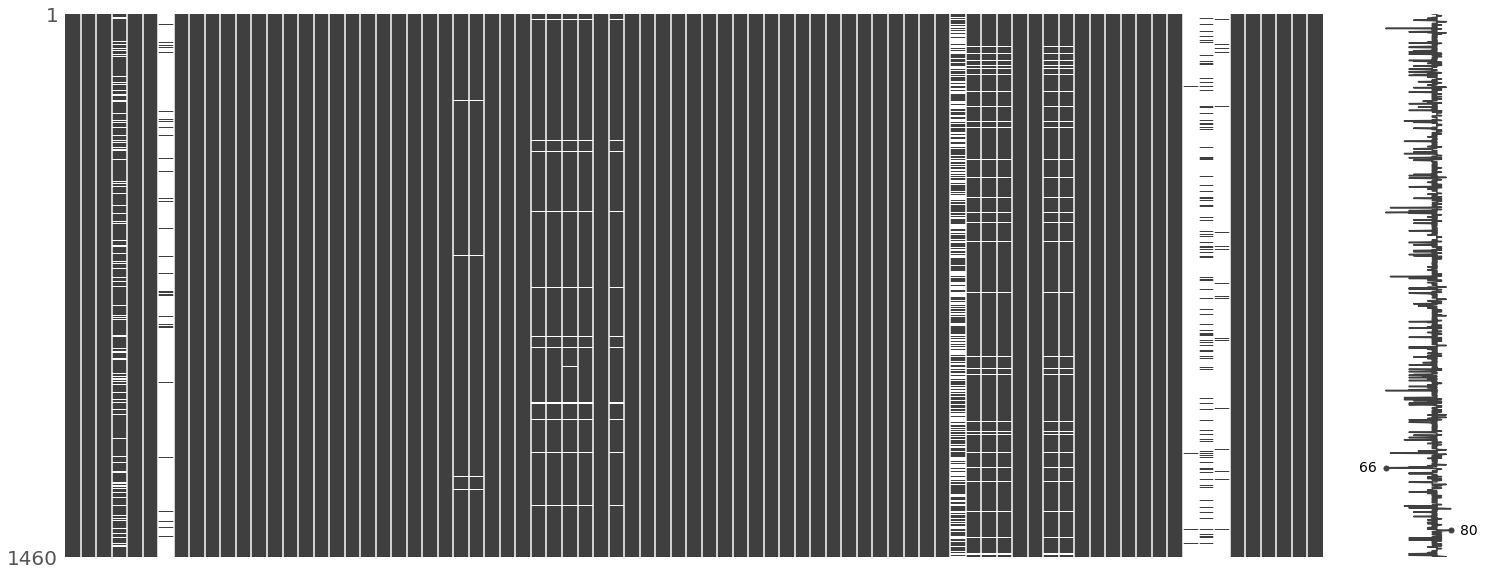

In [15]:
import missingno as msno

#各特徴量の欠損値の有無を確認する。
msno.matrix(df2)

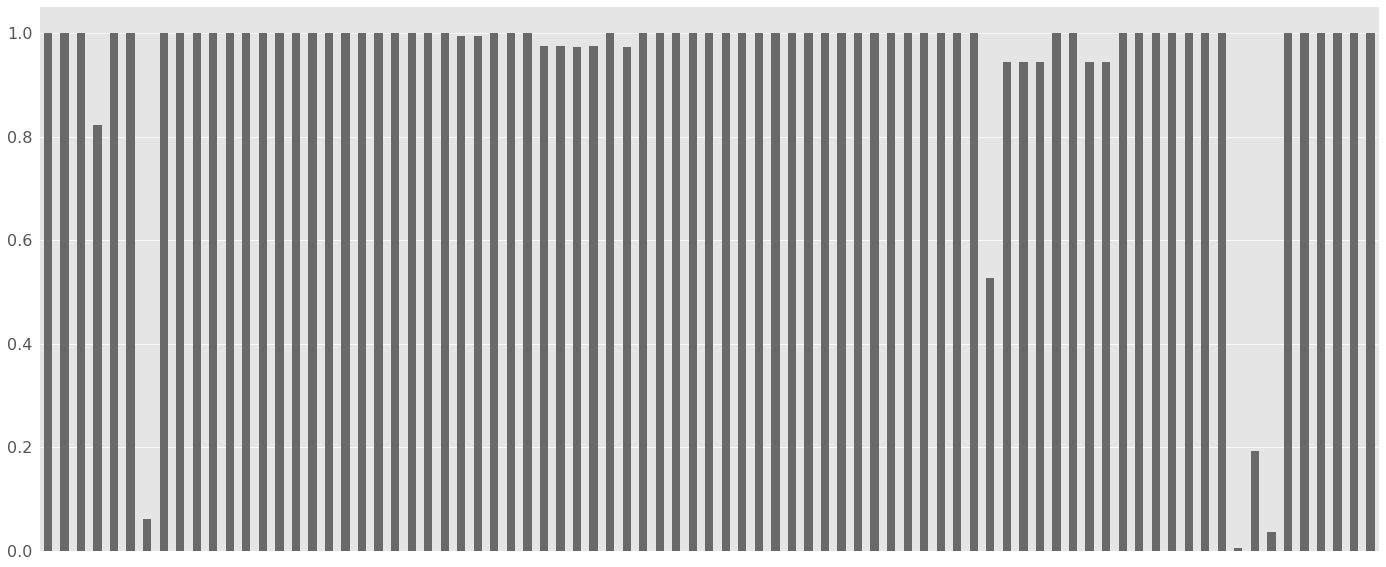

In [16]:
#欠損値が何パーセント含まれるかを確認する。
msno.bar(df2)

In [17]:
#5つ以上欠損値がある特徴量（列）は削除する。
null_num_ser = df2.isnull().sum()

print(null_num_ser)
print(type(null_num_ser))

#df3 = pd.DataFrame(index=[], columns=[])
df3 = df2

for key in df2.columns:
    if (null_num_ser[key] >= 5 ):
        df3 = df3.drop(labels=key, axis=1)

print("\n")
print("df2:")
display(df2)
display(df2.isnull().sum())

print("\n")
print("df3:")
display(df3)
display(df3.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
<class 'pandas.core.series.Series'>


df2:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64



df3:


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [18]:
#5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
df4 = df3.dropna()

print("\n")
print("df4:")
display(df4)
display(df4.isnull().sum())



df4:


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

###【問題5】用語の調査
```
以下の２つの単語を知る必要があります。これらを調査してまとめてください。
尖度
歪度
```

####【問題5 解答】
- 尖度
```
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。
サンプルサイズをn、各データの平均値を、標準偏差をsとすると尖度は次の式から求められます。
```
$$
\frac{n(n+1)}{(n-1)(n-2)(n-3)} \displaystyle \sum_{i = 1}^n 
\frac{(x_i - \overline{x})^4}{s^4} - \frac{3(n-1)^2}{(n-2)(n-3)}
$$
- 歪度
```
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。
サンプルサイズをn、各データの平均値を、標準偏差をsとすると歪度は次の式から求められます。
```
$$
\displaystyle　\frac{n}{(n - 1)(n - 2)} \displaystyle \sum_{i = 1}^n 
\left(\frac{x_i - \overline{x}}{s}\right)^3
$$

###【問題6】分布の確認
seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
目的変数に対して対数変換を行う。
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

###Normal###
歪度
1.8819429948035529
尖度
6.529263049673958


###Log Converted###
歪度
0.12131775882413662
尖度
0.806927847502144


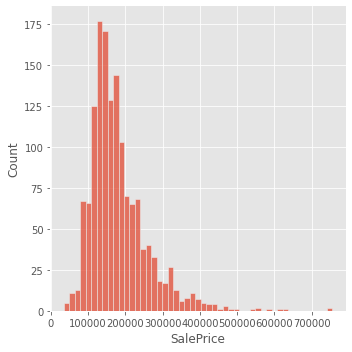

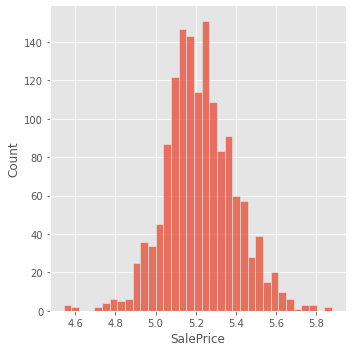

In [24]:
import seaborn as sns

#seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。 
sns.displot(df4.loc[:, "SalePrice"])
#sns.histplot(df4.loc[:, "SalePrice"])

print("###Normal###")
print("歪度")
print(df4.loc[:, "SalePrice"].skew()) #歪度
print("尖度")
print(df4.loc[:, "SalePrice"].kurt()) #尖度

#目的変数に対して対数変換を行う。 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
sale_price_ser = np.log10(df4.loc[:, "SalePrice"])
#print(sale_price_ser)

print("\n")
print("###Log Converted###")
sns.displot(sale_price_ser)
print("歪度")
print(sale_price_ser.skew()) #歪度
print("尖度")
print(sale_price_ser.kurt()) #尖度

####【問題6 解答】
目的変数を対数変換したことにより、分布が当初の左側に偏っていたのが、正規分布に近い形に変化した。

このことから、左右に偏りのあるデータや尖っているデータに対しては、対数変換を行うことで正規分布として扱える可能性があるといえる。

###【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。


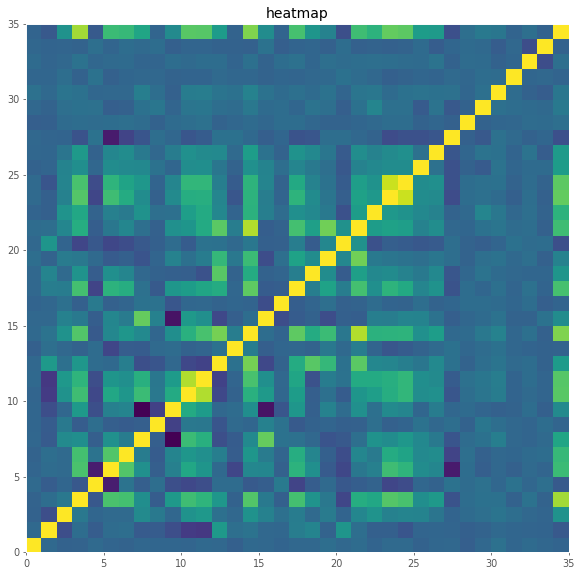

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,-0.013815,0.011627,0.004885,-0.044139,0.008524,0.003158,-0.019917,0.004758,0.005494,0.037577,0.003177,0.026948,-0.018788,0.016254,0.018010,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,-0.238160,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,0.040274,-0.045232,-0.040232,-0.098558,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.190037,0.271398,0.154893,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,0.537523,0.475933,0.295969,-0.030502,0.593021,0.110700,-0.040291,0.551267,0.274328,0.101789,-0.184040,0.427720,0.396455,0.600991,0.561980,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,-0.171796,-0.144646,0.029187,0.025454,-0.079777,-0.055250,0.117749,-0.193929,-0.060371,0.013039,-0.087085,-0.057485,-0.024167,-0.185670,-0.151662,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,0.393159,0.283056,0.009784,-0.183774,0.199286,0.188374,-0.037990,0.467960,0.241923,-0.070813,-0.174715,0.095401,0.148580,0.537866,0.479460,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,0.292546,0.241344,0.139607,-0.062356,0.287677,0.120148,-0.012165,0.438733,0.182595,-0.040718,-0.149503,0.191603,0.113360,0.420573,0.372012,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
BsmtFinSF1,-0.004001,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,-0.064604,0.208088,0.649025,0.067281,0.059102,0.005085,-0.107281,-0.081175,0.044529,0.259541,0.224342,0.296851,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.005668,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,0.104593,0.096948,-0.099146,0.014784,-0.009686,0.158557,0.070904,-0.076306,-0.031922,-0.015696,-0.040795,-0.035170,0.046748,-0.038204,-0.018295,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412
BsmtUnfSF,-0.007508,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,0.415283,0.317827,0.004661,0.028134,0.240210,-0.423256,-0.095880,0.289189,-0.040792,0.166701,0.030028,0.250754,0.051323,0.214284,0.183224,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446


In [20]:
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

#相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
fig, ax = plt.subplots(figsize=(10, 10), dpi=70)

ax.set_title("heatmap")
ax.pcolor(df4.corr())
plt.show()

display(df4.corr())

####【問題7 解答】
- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
```
目的変数(SalePrice)と相関の高い説明変数：
    OverallQual：全体的な素材と仕上がりの品質
    YearBuilt：元の建設日
    YearRemodAdd：改造日
    TotalBsmtSF：地下室の総平方フィート
    1stFlrSF：1階平方フィート
    GrLivArea：地上（地上）のリビングエリアの平方フィート
    FullBath：グレード以上のフルバスルーム
    TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）
    GarageCars：車の容量でのガレージのサイズ
    GarageArea：ガレージのサイズ（平方フィート）
```
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
```
  組み合わせ１：1stFlrSF - TotalBsmtSF (0.819393)
  組み合わせ２：TotRmsAbvGrd - GrLivArea (0.825576)
  組み合わせ３：GarageArea - GarageCars  (0.882613)
```


len(df5):1459


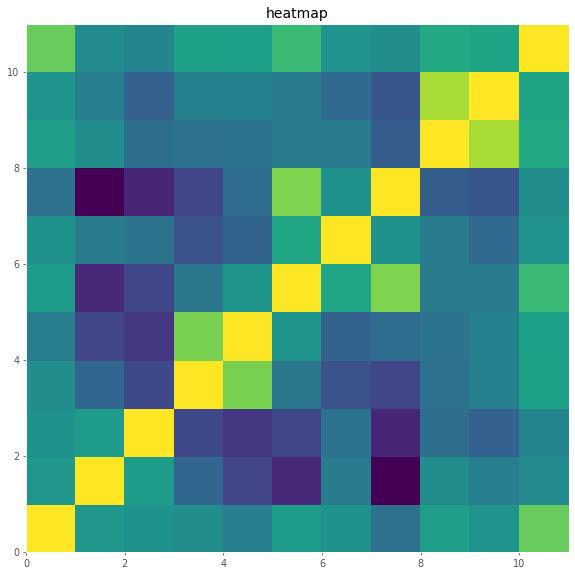

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.573334,0.551605,0.537523,0.475933,0.593021,0.551267,0.427720,0.600991,0.561980,0.791069
YearBuilt,0.573334,1.000000,0.592512,0.393159,0.283056,0.199286,0.467960,0.095401,0.537866,0.479460,0.523273
YearRemodAdd,0.551605,0.592512,1.000000,0.292546,0.241344,0.287677,0.438733,0.191603,0.420573,0.372012,0.507430
TotalBsmtSF,0.537523,0.393159,0.292546,1.000000,0.819393,0.455001,0.324886,0.286125,0.435279,0.486719,0.613905
1stFlrSF,0.475933,0.283056,0.241344,0.819393,1.000000,0.566084,0.381438,0.409901,0.439726,0.489741,0.605968
GrLivArea,0.593021,0.199286,0.287677,0.455001,0.566084,1.000000,0.630283,0.825576,0.467321,0.468971,0.708618
FullBath,0.551267,0.467960,0.438733,0.324886,0.381438,0.630283,1.000000,0.554759,0.469619,0.405944,0.560881
TotRmsAbvGrd,0.427720,0.095401,0.191603,0.286125,0.409901,0.825576,0.554759,1.000000,0.362248,0.337915,0.533779
GarageCars,0.600991,0.537866,0.420573,0.435279,0.439726,0.467321,0.469619,0.362248,1.000000,0.882613,0.640473
GarageArea,0.561980,0.479460,0.372012,0.486719,0.489741,0.468971,0.405944,0.337915,0.882613,1.000000,0.623423


In [21]:
#目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
col_list = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"]
df5 = df4.loc[:, col_list]

print("len(df5):{}".format(len(df5)))

#相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
fig2, ax2 = plt.subplots(figsize=(10, 10), dpi=70)

ax2.set_title("heatmap")
ax2.pcolor(df5.corr())
plt.show()

display(df5.corr())
